<a href="https://colab.research.google.com/github/Vaish203-Desai/Insurance_Policy_Onboarding_Automation/blob/main/Insurance_Policy_onboarding_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.3 MB/s eta 0:00:00


In [3]:
from faker import Faker
import pandas as pd

fake = Faker('en_IN')  # Use Indian locale for realism
data = []
for _ in range(100):
    record = {
        "name": fake.name(),
        "address": fake.address().replace('\n', ', '),
        "dob": fake.date_of_birth(minimum_age=18, maximum_age=60),
        "aadhaar": fake.random_number(digits=12),
        "pan": fake.bothify(text='?????####?'),
        "phone": fake.phone_number(),
        "email": fake.email()
    }
    data.append(record)

df_kyc = pd.DataFrame(data)
df_kyc.to_csv("synthetic_kyc.csv", index=False)


In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [4]:
df_kyc = pd.read_csv('/content/synthetic_kyc.csv')

In [ ]:
df_kyc.head()

,name,address,dob,aadhaar,pan,phone,email
0,Upkaar Borah,"H.No. 333, Handa Chowk, Dehri 472641",2002-02-21,478990992748,hsNKL8936f,1363995384,jairaj79@example.net
1,Vincent Muni,"30/78, Sarraf Nagar, Begusarai-531933",1991-03-25,306764843210,sKmWO6767H,530116753,chopraanmol@example.org
2,Udant Sampath,"30/144, Mangal Ganj, Panchkula 559688",1995-07-31,613994594739,YXhbw9946g,1842703289,kurianamruta@example.com
3,Chanakya Khare,"33/83, Krishnan Path, Ramgarh 964802",1990-11-21,865218951080,ATPra2675V,2139419652,harishsanghvi@example.org
4,Yauvani Ganesan,"H.No. 751, Dugar Circle, Sambhal 828798",1997-10-19,648819570285,qxRNy4542K,5994153006,prabhakarowen@example.org


In [ ]:
df_kyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     100 non-null    object
 1   address  100 non-null    object
 2   dob      100 non-null    object
 3   aadhaar  100 non-null    int64 
 4   pan      100 non-null    object
 5   phone    100 non-null    int64 
 6   email    100 non-null    object
dtypes: int64(2), object(5)
memory usage: 5.6+ KB


In [ ]:
df_kyc.isnull().sum()

,0
name,0
address,0
dob,0
aadhaar,0
pan,0
phone,0
email,0


In [5]:
from faker import Faker
import pandas as pd
import random

fake = Faker('en_IN')  # Indian locale for realism

data = []
for i in range(100):
    customer_id = f"CUST{1000 + i}"  # unique customer IDs
    record = {
        "customer_id": customer_id,
        "name": fake.name(),
        "address": fake.address().replace('\n', ', '),
        "dob": fake.date_of_birth(minimum_age=18, maximum_age=60),
        "aadhaar": fake.random_number(digits=12),
        "pan": fake.bothify(text='?????####?'),
        "phone": fake.phone_number(),
        "email": fake.email(),

        # Synthetic Claim Data
        "policy_number": f"POL{random.randint(100000, 999999)}",
        "claim_amount": round(random.uniform(5000, 200000), 2),  # ₹5k–₹2L range
        "claim_date": fake.date_between(start_date='-3y', end_date='today')
    }
    data.append(record)

# Create DataFrame
df_claims = pd.DataFrame(data)

# Save to CSV
df_claims.to_csv("synthetic_kyc_claim_data.csv", index=False)

print("✅ Synthetic KYC + Claim dataset created successfully!")
print(df_claims.head())


✅ Synthetic KYC + Claim dataset created successfully!
  customer_id             name                                address  \
0    CUST1000     Zashil Nagar   H.No. 74, Sahni Nagar, Bhilai-066344   
1    CUST1001       Amruta Vig      23/62, Murthy, Farrukhabad 113869   
2    CUST1002     Benjamin Pau      54/75, Bains Zila, Panipat 892300   
3    CUST1003  Chaitanya Lalla  H.No. 22, Mishra Street, Korba 492432   
4    CUST1004    Warhi Trivedi      38, Seshadri Zila, Katihar 008303   

          dob       aadhaar         pan          phone  \
0  1970-03-08  874678391638  GiHjP9981c    03801747361   
1  1986-12-20   11677585012  hRpkt6183V     6867570588   
2  1986-05-29  296477792507  IuCEN4778j  +916211352295   
3  1996-10-09  939159451190  lWnqi3458l    07273590966   
4  1977-02-07  859440057080  oBksb0821t  +912177367575   

                     email policy_number  claim_amount  claim_date  
0       sara89@example.net     POL413227     119233.42  2023-04-09  
1   xdeshpande@examp

In [ ]:
df_claims.head()

,customer_id,name,address,dob,aadhaar,pan,phone,email,policy_number,claim_amount,claim_date
0,CUST1000,Garima Shere,"28, Chacko, Aizawl 403463",1982-04-27,704780606224,ISoXR4521h,03625732057,bhatgaurang@example.com,POL286774,164696.00,2024-03-15
1,CUST1001,Ria Mangal,"04, Subramaniam Marg, Anand-235198",1991-05-20,848153004022,RvqmG2115E,9786410005,aadi99@example.org,POL595798,63588.30,2023-03-08
2,CUST1002,Ekavir Joshi,"57, Banik Road, Khammam 671729",2004-08-29,395562877045,KWBCL0624U,+911794647593,sekhonbalhaar@example.org,POL271752,82717.71,2023-05-03
3,CUST1003,Manbir Shan,"H.No. 83, Parmar Road, Naihati-134766",1979-05-15,194510604060,CIDLn6783y,+919263103039,anyaperi@example.net,POL348394,186877.63,2025-06-17
4,CUST1004,Urvashi Menon,"24, Gala Road, Ghaziabad 606991",1999-12-01,848346306040,lKWSE4179T,2686618707,madhavramachandran@example.com,POL108648,127415.74,2023-09-30


In [6]:
ocr_texts = []
for _, row in df_claims.iterrows():
    text = f"""
    Name: {row['name']}
    Address: {row['address']}
    DOB: {row['dob']}
    Aadhaar No: {row['aadhaar']}
    PAN: {row['pan']}
    Phone: {row['phone']}
    Email: {row['email']}
    Policy No: {row['policy_number']}
    Claim Amount: ₹{row['claim_amount']}
    Claim Date: {row['claim_date']}
    """
    ocr_texts.append(text)


In [7]:
import re

def extract_fields(text):
    patterns = {
        "name": r"Name:\s*(.*)",
        "address": r"Address:\s*(.*)",
        "aadhaar": r"Aadhaar No:\s*(\d{12})",
        "pan": r"PAN:\s*([A-Z]{5}\d{4}[A-Z])",
        "phone": r"Phone:\s*([\+\d\- ]{10,})",
        "email": r"Email:\s*([\w\.-]+@[\w\.-]+)",
         "policy_number": r"Policy No:\s*(POL\d+)",
        "claim_amount": r"Claim Amount:\s*₹?([\d\.]+)",
        "claim_date": r"Claim Date:\s*(.*)"
    }

    extracted = {}
    for key, pattern in patterns.items():
        match = re.search(pattern, text)
        extracted[key] = match.group(1).strip() if match else None
    return extracted

# Apply the extraction
structured_extracted = [extract_fields(t) for t in ocr_texts]
df_extracted = pd.DataFrame(structured_extracted)
print(df_extracted.head())


              name                                address       aadhaar   pan  \
0     Zashil Nagar   H.No. 74, Sahni Nagar, Bhilai-066344  874678391638  None   
1       Amruta Vig      23/62, Murthy, Farrukhabad 113869          None  None   
2     Benjamin Pau      54/75, Bains Zila, Panipat 892300  296477792507  None   
3  Chaitanya Lalla  H.No. 22, Mishra Street, Korba 492432  939159451190  None   
4    Warhi Trivedi      38, Seshadri Zila, Katihar 008303  859440057080  None   

           phone                    email policy_number claim_amount  \
0    03801747361       sara89@example.net     POL413227    119233.42   
1     6867570588   xdeshpande@example.com     POL550493     76494.91   
2  +916211352295     raikiaan@example.com     POL698996     25677.88   
3    07273590966  munipallavi@example.org     POL772398    137270.65   
4  +912177367575      fbhasin@example.com     POL260562    140182.26   

   claim_date  
0  2023-04-09  
1  2022-12-19  
2  2023-06-08  
3  2023-11-03  


In [8]:
structured_data = [extract_fields(t) for t in ocr_texts]
df_extracted = pd.DataFrame(structured_data)
print(df_extracted.head())


              name                                address       aadhaar   pan  \
0     Zashil Nagar   H.No. 74, Sahni Nagar, Bhilai-066344  874678391638  None   
1       Amruta Vig      23/62, Murthy, Farrukhabad 113869          None  None   
2     Benjamin Pau      54/75, Bains Zila, Panipat 892300  296477792507  None   
3  Chaitanya Lalla  H.No. 22, Mishra Street, Korba 492432  939159451190  None   
4    Warhi Trivedi      38, Seshadri Zila, Katihar 008303  859440057080  None   

           phone                    email policy_number claim_amount  \
0    03801747361       sara89@example.net     POL413227    119233.42   
1     6867570588   xdeshpande@example.com     POL550493     76494.91   
2  +916211352295     raikiaan@example.com     POL698996     25677.88   
3    07273590966  munipallavi@example.org     POL772398    137270.65   
4  +912177367575      fbhasin@example.com     POL260562    140182.26   

   claim_date  
0  2023-04-09  
1  2022-12-19  
2  2023-06-08  
3  2023-11-03  


In [9]:
comparison_cols = ['name', 'address', 'aadhaar', 'pan', 'phone', 'email']
accuracy = (df_extracted[comparison_cols] == df_claims[comparison_cols]).mean() * 100
print("\nExtraction Accuracy (%):")
print(accuracy)



Extraction Accuracy (%):
name       100.0
address    100.0
aadhaar      0.0
pan          1.0
phone      100.0
email      100.0
dtype: float64


In [10]:
# Save extracted structured data to CSV
df_extracted.to_csv("extracted_kyc_data.csv", index=False)

print("✅ Extracted data saved successfully as 'extracted_kyc_data.csv'")


✅ Extracted data saved successfully as 'extracted_kyc_data.csv'


In [11]:
df = pd.read_csv("synthetic_kyc_claim_data.csv")
print(df.head())
print(df.info())

  customer_id             name                                address  \
0    CUST1000     Zashil Nagar   H.No. 74, Sahni Nagar, Bhilai-066344   
1    CUST1001       Amruta Vig      23/62, Murthy, Farrukhabad 113869   
2    CUST1002     Benjamin Pau      54/75, Bains Zila, Panipat 892300   
3    CUST1003  Chaitanya Lalla  H.No. 22, Mishra Street, Korba 492432   
4    CUST1004    Warhi Trivedi      38, Seshadri Zila, Katihar 008303   

          dob       aadhaar         pan         phone  \
0  1970-03-08  874678391638  GiHjP9981c    3801747361   
1  1986-12-20   11677585012  hRpkt6183V    6867570588   
2  1986-05-29  296477792507  IuCEN4778j  916211352295   
3  1996-10-09  939159451190  lWnqi3458l    7273590966   
4  1977-02-07  859440057080  oBksb0821t  912177367575   

                     email policy_number  claim_amount  claim_date  
0       sara89@example.net     POL413227     119233.42  2023-04-09  
1   xdeshpande@example.com     POL550493      76494.91  2022-12-19  
2     raiki

In [12]:
import numpy as np

# Convert claim_date to datetime
df['claim_date'] = pd.to_datetime(df['claim_date'], errors='coerce')

# Feature: extract claim month and year
df['claim_month'] = df['claim_date'].dt.month
df['claim_year'] = df['claim_date'].dt.year

# Feature: approximate age from dob
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['age'] = (pd.Timestamp.now() - df['dob']).dt.days // 365

# Keep numeric features for modeling
features = df[['claim_amount', 'claim_month', 'claim_year', 'age']]

print(features.head())


   claim_amount  claim_month  claim_year  age
0     119233.42            4        2023   55
1      76494.91           12        2022   38
2      25677.88            6        2023   39
3     137270.65           11        2023   29
4     140182.26           10        2024   48


In [14]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Train Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_score'] = iso.fit_predict(X_scaled)

# Label: -1 = anomaly (potential fraud), 1 = normal
df['fraud_flag'] = df['anomaly_score'].apply(lambda x: 'Fraudulent' if x == -1 else 'Normal')

print(df[['customer_id', 'claim_amount', 'fraud_flag']].head(10))

  customer_id  claim_amount  fraud_flag
0    CUST1000     119233.42      Normal
1    CUST1001      76494.91  Fraudulent
2    CUST1002      25677.88      Normal
3    CUST1003     137270.65      Normal
4    CUST1004     140182.26      Normal
5    CUST1005      13841.00      Normal
6    CUST1006      32191.77  Fraudulent
7    CUST1007      43791.28      Normal
8    CUST1008      63703.32      Normal
9    CUST1009     190580.67      Normal


In [15]:
fraud_summary = df['fraud_flag'].value_counts()
print("\nFraud Detection Summary:")
print(fraud_summary)

# Check average claim amount difference
print("\nAverage Claim Amounts:")
print(df.groupby('fraud_flag')['claim_amount'].mean())



Fraud Detection Summary:
fraud_flag
Normal        95
Fraudulent     5
Name: count, dtype: int64

Average Claim Amounts:
fraud_flag
Fraudulent     48902.080000
Normal        111836.024421
Name: claim_amount, dtype: float64


In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [17]:
# Autoencoder architecture
input_dim = X_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(8, activation='relu')(input_layer)
encoder = Dense(4, activation='relu')(encoder)
decoder = Dense(8, activation='relu')(encoder)
decoder = Dense(input_dim, activation='linear')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=30, batch_size=8, verbose=0)

# Reconstruction error
reconstructions = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)
threshold = np.percentile(mse, 95)  # Top 5% = anomalies

df['autoencoder_fraud_flag'] = np.where(mse > threshold, 'Fraudulent', 'Normal')
print(df[['customer_id', 'claim_amount', 'autoencoder_fraud_flag']].head())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
  customer_id  claim_amount autoencoder_fraud_flag
0    CUST1000     119233.42                 Normal
1    CUST1001      76494.91                 Normal
2    CUST1002      25677.88                 Normal
3    CUST1003     137270.65                 Normal
4    CUST1004     140182.26                 Normal


In [18]:
df.to_csv("claim_data_with_fraud_flags.csv", index=False)
print("✅ Saved file with fraud detection results: claim_data_with_fraud_flags.csv")


✅ Saved file with fraud detection results: claim_data_with_fraud_flags.csv


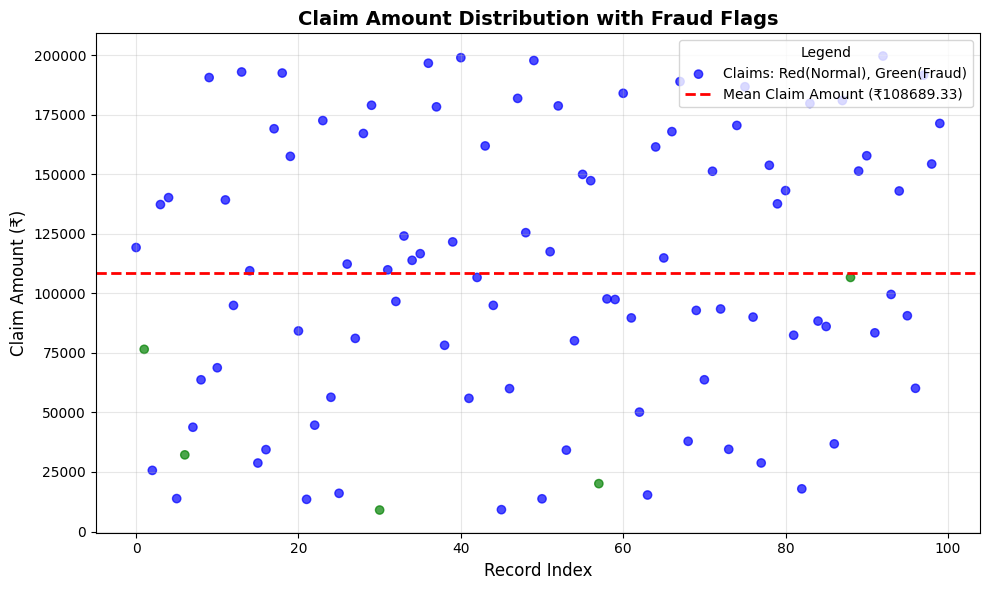

In [23]:
# Compute mean claim amount
mean_claim = df['claim_amount'].mean()

# Assign colors based on fraud flag
color_map = {'Normal': 'blue', 'Fraudulent': 'green'}
colors = df['fraud_flag'].map(color_map)

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df.index, df['claim_amount'], c=colors, label='Claims: Red(Normal), Green(Fraud)', alpha=0.7)

# Plot mean claim line in red
plt.axhline(y=mean_claim, color='red', linestyle='--', linewidth=2, label=f'Mean Claim Amount (₹{mean_claim:.2f})')

# Labels, title, legend
plt.title("Claim Amount Distribution with Fraud Flags", fontsize=14, weight='bold')
plt.xlabel("Record Index", fontsize=12)
plt.ylabel("Claim Amount (₹)", fontsize=12)
plt.legend(title="Legend", loc="upper right")
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

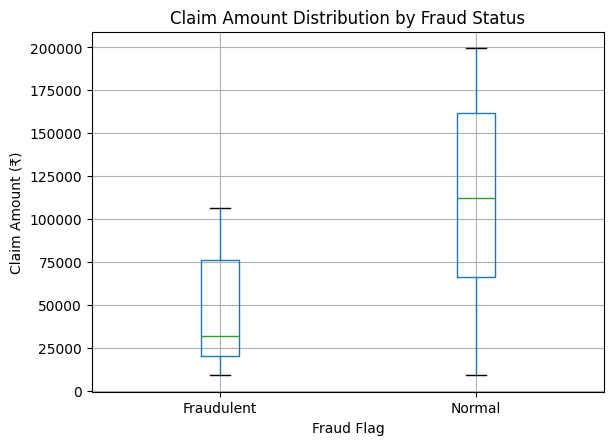

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.boxplot(column='claim_amount', by='fraud_flag')
plt.title("Claim Amount Distribution by Fraud Status")
plt.suptitle("")
plt.xlabel("Fraud Flag")
plt.ylabel("Claim Amount (₹)")
plt.show()
